# EDA - Samsung

In [1]:
import pandas as pd

In [2]:
df_2 = pd.read_json("reddit_samsung.json")
df_2.head()

,Title,Upvotes,URL,Created,Text
0,In market for new phone... is Samsung hard to ...,2,https://www.reddit.com/r/samsung/comments/1hyt...,1736591458,My phone is Samsung Galaxy S20. Bought back in...
1,Samsung s24+ swipe texting is terrible,3,https://www.reddit.com/r/samsung/comments/1hyr...,1736585802,On my s23 the swipe texting was so accurate th...
2,S23 vs S24 fe,5,https://www.reddit.com/r/samsung/comments/1hyr...,1736584674,I am undecided about these phones s23 and s24f...
3,Samsung S23 FE charging,2,https://www.reddit.com/r/samsung/comments/1hyr...,1736583186,My S23 FE lost all charge today whilst I was d...
4,connecting TV to SDK (Tizen studio device mana...,1,https://www.reddit.com/r/samsung/comments/1hyq...,1736581442,"Wanted to connect the samsung TV to SDK , but ..."


In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9490 non-null   object
 1   Upvotes  9490 non-null   int64 
 2   URL      9490 non-null   object
 3   Created  9490 non-null   int64 
 4   Text     9490 non-null   object
dtypes: int64(2), object(3)
memory usage: 370.8+ KB


In [4]:
samsung = df_2.drop_duplicates()

In [5]:
samsung

,Title,Upvotes,URL,Created,Text
0,In market for new phone... is Samsung hard to ...,2,https://www.reddit.com/r/samsung/comments/1hyt...,1736591458,My phone is Samsung Galaxy S20. Bought back in...
1,Samsung s24+ swipe texting is terrible,3,https://www.reddit.com/r/samsung/comments/1hyr...,1736585802,On my s23 the swipe texting was so accurate th...
2,S23 vs S24 fe,5,https://www.reddit.com/r/samsung/comments/1hyr...,1736584674,I am undecided about these phones s23 and s24f...
3,Samsung S23 FE charging,2,https://www.reddit.com/r/samsung/comments/1hyr...,1736583186,My S23 FE lost all charge today whilst I was d...
4,connecting TV to SDK (Tizen studio device mana...,1,https://www.reddit.com/r/samsung/comments/1hyq...,1736581442,"Wanted to connect the samsung TV to SDK , but ..."
...,...,...,...,...,...
9375,Do you directly unlock phone or use lockscreen?,69,https://www.reddit.com/r/samsung/comments/1hf6...,1734307049,Hi all! Do you guys use your lockscreen to che...
9413,Does Samsung update the camera?,38,https://www.reddit.com/r/samsung/comments/1hed...,1734214167,"Forget UI overhauls and oneUI 7, let's talk ab..."
9420,I will cry when my Galaxy S9 dies,220,https://www.reddit.com/r/samsung/comments/1he6...,1734193757,It has all my old games I still play when I'm ...
9429,"I just bought a samsung s21 fe, now what?",6,https://www.reddit.com/r/samsung/comments/1hdt...,1734145770,Its my second flagship ever phone after the s5...


In [6]:
## so finally from samsung we are able to extract around 1600 rows.

In [7]:
samsung.describe

<bound method NDFrame.describe of                                                   Title  Upvotes  \
0     In market for new phone... is Samsung hard to ...        2   
1                Samsung s24+ swipe texting is terrible        3   
2                                         S23 vs S24 fe        5   
3                               Samsung S23 FE charging        2   
4     connecting TV to SDK (Tizen studio device mana...        1   
...                                                 ...      ...   
9375    Do you directly unlock phone or use lockscreen?       69   
9413                    Does Samsung update the camera?       38   
9420                  I will cry when my Galaxy S9 dies      220   
9429          I just bought a samsung s21 fe, now what?        6   
9444     A34 vs A54, worth going for A54 for £30 more ?        6   

                                                    URL     Created  \
0     https://www.reddit.com/r/samsung/comments/1hyt...  1736591458   
1     h

In [8]:
samsung.isnull().sum()

Title      0
Upvotes    0
URL        0
Created    0
Text       0
dtype: int64

In [9]:
import re
import nltk
from nltk.corpus import stopwords

In [10]:
def clean_text(text):
    # this is converting my entire text to lowercase
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text) # removing punctuation and non-alphabetic characters of text clumn.

    stop_words = set(stopwords.words('english'))     # Removing stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Removing extra spaces
    text = ' '.join(text.split())

    return text

In [11]:
samsung['Text'][2]

"I am undecided about these phones s23 and s24fe.\nI don't play any game on the phone nor use it for cpu/gpu oriented tasks.I just use it to watch videos,movies, everyday use and use the camera.I don't care about the cpu/gpu performance.So are there any other important differences between these two phones?Such as battery,cooling,futureproof and etc.\nS24 fe is far more cheaper than s23 in my country.So I am considering the s24 fe but i need some insights."

In [12]:
## like this if we have any comment like below 
raw_text = "My Samsung Galaxy S21 keeps freezing after the latest update. Anyone else facing this issue?"
cleaned_text = clean_text(raw_text)
cleaned_text

'samsung galaxy keeps freezing latest update anyone else facing issue'

In [13]:
samsung = samsung.drop(columns=['URL'])

In [14]:
## Clean- text

In [15]:
samsung.loc[:, 'Text'] = samsung['Text'].apply(clean_text)

## using Vader

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
samsung_ana = SentimentIntensityAnalyzer() # VADER sentiment analyzer

In [18]:
## simply defining a fucntion named assign_sentiment.

def assign_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
# Apply VADER sentiment analysis
samsung.loc[:, 'Sentiment-Vader'] = samsung['Text'].apply(lambda x: assign_sentiment(samsung_ana.polarity_scores(x)['compound']))

In [20]:
samsung['Sentiment-Vader']

0       Positive
1       Positive
2       Negative
3       Negative
4       Negative
          ...   
9375     Neutral
9413    Positive
9420    Positive
9429    Positive
9444    Positive
Name: Sentiment-Vader, Length: 1862, dtype: object

In [21]:
samsung['Sentiment-Vader'].value_counts()

Sentiment-Vader
Positive    1237
Negative     342
Neutral      283
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

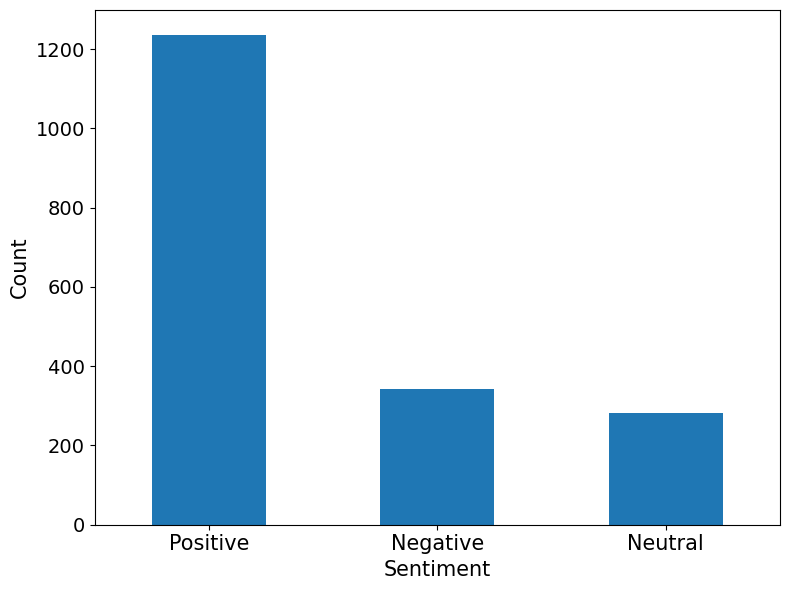

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
samsung['Sentiment-Vader'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [24]:
samsung['Upvotes']

0         2
1         3
2         5
3         2
4         1
       ... 
9375     69
9413     38
9420    220
9429      6
9444      6
Name: Upvotes, Length: 1862, dtype: int64

In [25]:
samsung['Upvotes'].mean

<bound method Series.mean of 0         2
1         3
2         5
3         2
4         1
       ... 
9375     69
9413     38
9420    220
9429      6
9444      6
Name: Upvotes, Length: 1862, dtype: int64>

In [26]:
samsung['Upvotes'].mean()

33.79967776584318

In [27]:
## it simply defines the average of likes.

In [28]:
samsung.groupby('Sentiment-Vader')

In [29]:
samsung.groupby('Sentiment-Vader')['Upvotes'].mean()

Sentiment-Vader
Negative    29.543860
Neutral     70.925795
Positive    26.482619
Name: Upvotes, dtype: float64

<Axes: xlabel='Sentiment-Vader'>

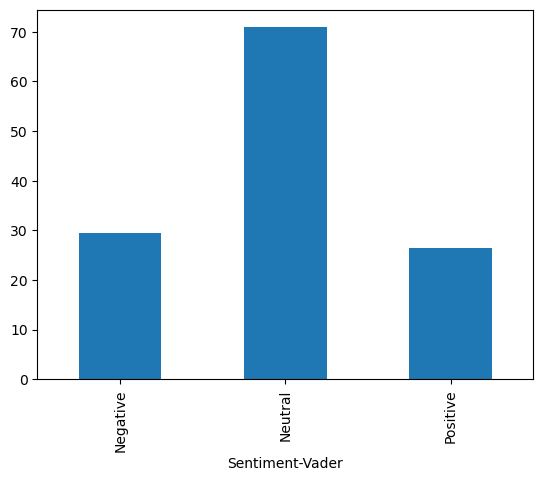

In [30]:
samsung.groupby('Sentiment-Vader')['Upvotes'].mean().plot(kind='bar')

## Temporal Sentiment Analysis

In [31]:
samsung['Created']  ## it is showing the timestamp, about the particular post like when it posted.

0       1736591458
1       1736585802
2       1736584674
3       1736583186
4       1736581442
           ...    
9375    1734307049
9413    1734214167
9420    1734193757
9429    1734145770
9444    1734104120
Name: Created, Length: 1862, dtype: int64

In [32]:
samsung['Created'].unique()

array([1736591458, 1736585802, 1736584674, 1736583186, 1736581442,
       1736576453, 1736563413, 1736558545, 1736553068, 1736552127,
       1736548814, 1736547020, 1736543801, 1736538154, 1736538003,
       1736535220, 1736530896, 1736528778, 1736523643, 1736523470,
       1736522809, 1736522251, 1736517633, 1736517517, 1736506891,
       1736503416, 1736503202, 1736499306, 1736494315, 1736494185,
       1736492284, 1736492031, 1736488921, 1736488322, 1736484186,
       1736482062, 1736481291, 1736479713, 1736479421, 1736474899,
       1736474292, 1736469685, 1736467874, 1736466285, 1736466180,
       1736457016, 1736455196, 1736453889, 1736449283, 1736442721,
       1736441026, 1736439850, 1736434027, 1736432756, 1736430946,
       1736430309, 1736425980, 1736423508, 1736422668, 1736420492,
       1736410517, 1736406950, 1736405811, 1736405694, 1736405252,
       1736399540, 1736399030, 1736397751, 1736396723, 1736396256,
       1736395267, 1736385416, 1736383657, 1736377283, 1736375

In [33]:
samsung['Created'].isna().sum()  ## simply give the count the number of missing values.

0

In [34]:
samsung['Created'] = pd.to_datetime(samsung['Created'],unit = 's' , errors='coerce')

In [35]:
samsung['Created'].unique()

<DatetimeArray>
['2025-01-11 10:30:58', '2025-01-11 08:56:42', '2025-01-11 08:37:54',
 '2025-01-11 08:13:06', '2025-01-11 07:44:02', '2025-01-11 06:20:53',
 '2025-01-11 02:43:33', '2025-01-11 01:22:25', '2025-01-10 23:51:08',
 '2025-01-10 23:35:27',
 ...
 '2024-12-11 10:25:07', '2024-12-11 09:29:14', '2024-12-11 08:52:21',
 '2024-12-11 04:51:09', '2024-12-11 04:44:33', '2024-12-11 04:38:13',
 '2024-12-11 03:05:28', '2024-12-11 02:53:14', '2024-12-11 01:06:29',
 '2024-12-11 00:59:13']
Length: 949, dtype: datetime64[ns]

In [36]:
from textblob import TextBlob

In [37]:
def for_sentiment(text):
    sentiment = samsung_ana.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment

In [38]:
# Apply sentiment analysis to the text column
samsung['sentiment'] = samsung['Text'].apply(lambda x: for_sentiment(x) if isinstance(x, str) else None)

In [39]:
samsung['sentiment'] = pd.to_numeric(samsung['sentiment'], errors='coerce')

In [40]:
daily_sentiment = samsung.groupby('Created')['sentiment'].mean().reset_index()

In [41]:
daily_sentiment.head()

,Created,sentiment
0,2024-12-11 00:59:13,0.3612
1,2024-12-11 01:06:29,0.2263
2,2024-12-11 02:53:14,0.0433
3,2024-12-11 03:05:28,0.4601
4,2024-12-11 04:38:13,0.8625


In [42]:
import matplotlib.pyplot as plt

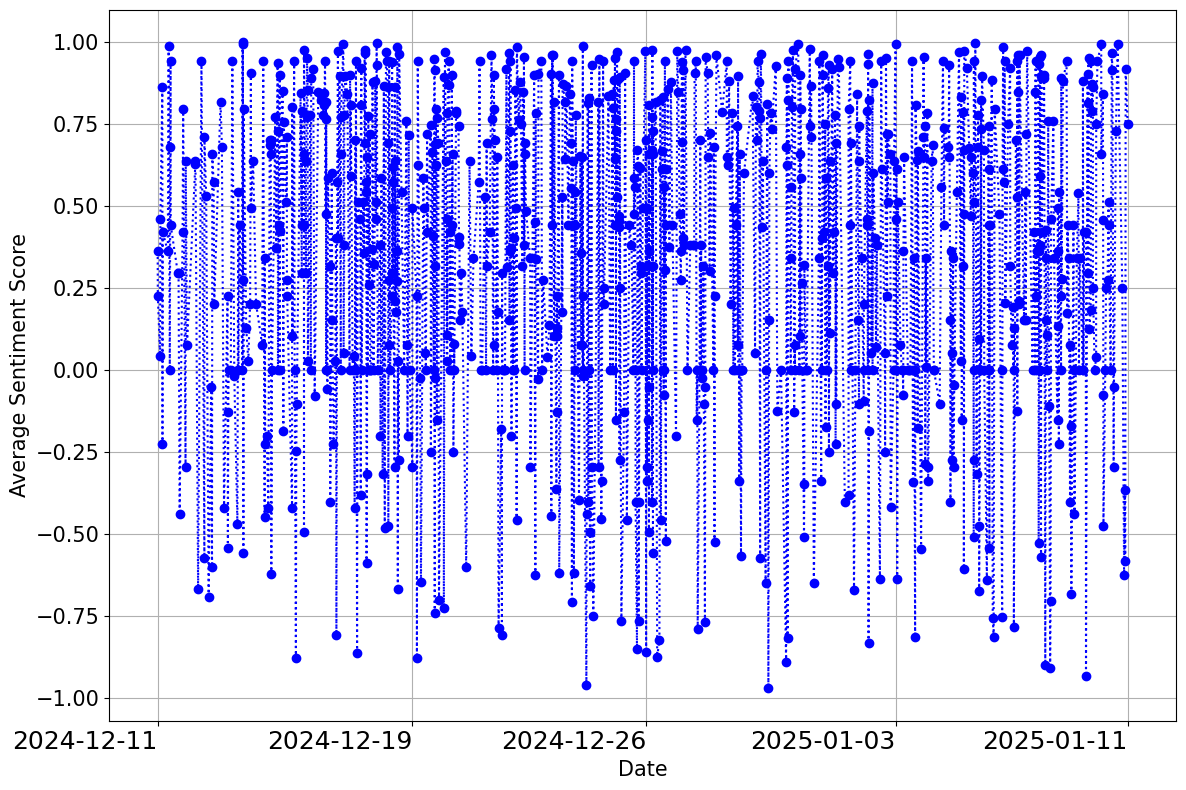

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with a dotted line and blue color
ax.plot(daily_sentiment['Created'], daily_sentiment['sentiment'], marker='o', linestyle=':', color='b')

# Remove the title
# plt.title('Temporal Sentiment Shifts Over Days', fontsize=18)  # Removed as per request

# Labels with larger font size
plt.xlabel('Date', fontsize=15)  # Increased font size for x-label
plt.ylabel('Average Sentiment Score', fontsize=15)  # Increased font size for y-label

# Adjust the x-ticks to show fewer labels and rotate them for clarity
plt.xticks(rotation=0, ha='right', fontsize=18)  # Increased rotation and font size for x-ticks

# Increase font size for y-ticks without changing the ticks themselves
plt.yticks(fontsize=15)  # Increased font size for y-ticks

# Set the x-ticks to show 5 values: first, last, and 3 equally spaced ones in between
num_ticks = 5
x_positions = [0, len(daily_sentiment) - 1]  # Start with first and last positions
interval = len(daily_sentiment) // (num_ticks - 1)  # Calculate interval for 3 equally spaced ticks

# Add 3 equally spaced ticks between the first and last positions
x_positions.extend(range(interval, len(daily_sentiment) - 1, interval))

# Set x-ticks based on the calculated positions
ax.set_xticks(daily_sentiment['Created'].iloc[x_positions])

# Show grid for better visibility
plt.grid(True)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
samsung.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment
0,In market for new phone... is Samsung hard to ...,2,2025-01-11 10:30:58,phone samsung galaxy bought back think last ti...,Positive,0.7506
1,Samsung s24+ swipe texting is terrible,3,2025-01-11 08:56:42,swipe texting accurate rarely type manually ge...,Positive,0.9162
2,S23 vs S24 fe,5,2025-01-11 08:37:54,undecided phones sfe dont play game phone use ...,Negative,-0.5809
3,Samsung S23 FE charging,2,2025-01-11 08:13:06,fe lost charge today whilst driving home tried...,Negative,-0.3658
4,connecting TV to SDK (Tizen studio device mana...,1,2025-01-11 07:44:02,wanted connect samsung tv sdk getting error ad...,Negative,-0.6249


In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud = WordCloud(width=800, height=400).generate(" ".join(samsung['Text'])) # Most Frequent Words.

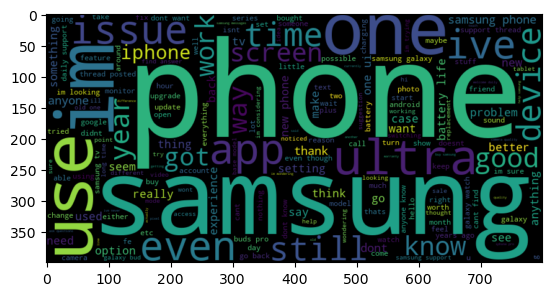

In [47]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Wordcloud for Positive vs Negative Sentiments

In [48]:
positive_reviews_count = len(samsung[samsung['Sentiment-Vader'] == 'Positive'])
negative_reviews_count = len(samsung[samsung['Sentiment-Vader'] == 'Negative'])

In [49]:
positive_reviews_count

1237

In [50]:
negative_reviews_count

342

In [51]:
### Positive and negative review text
positive_reviews = ' '.join(samsung[samsung['Sentiment-Vader'] == 'Positive']['Text'])
negative_reviews = ' '.join(samsung[samsung['Sentiment-Vader'] == 'Negative']['Text'])

In [52]:
## Generating wordcloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

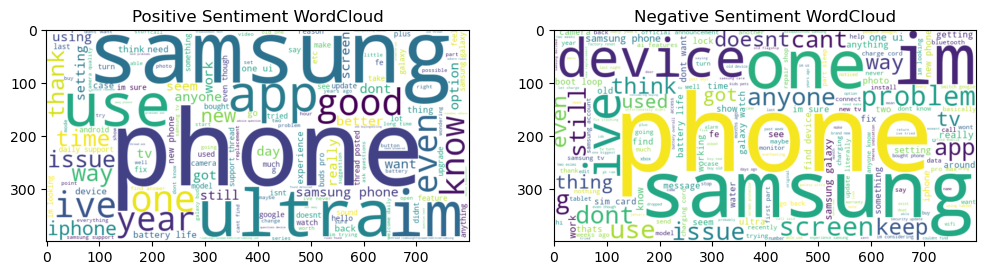

In [53]:
## plotting.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.show()

In [54]:
samsung.columns

Index(['Title', 'Upvotes', 'Created', 'Text', 'Sentiment-Vader', 'sentiment'], dtype='object')

In [55]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [56]:
# Apply sentiment analysis to the text column
samsung['Sentiment'] = samsung['Text'].apply(lambda x: get_sentiment(x) if isinstance(x, str) else None)

In [57]:
samsung.loc[:, 'Sentiment-TB'] = samsung['Text'].apply(lambda x: get_sentiment(x))

In [58]:
samsung['Sentiment-TB'].value_counts()

Sentiment-TB
Positive    1248
Negative     349
Neutral      265
Name: count, dtype: int64

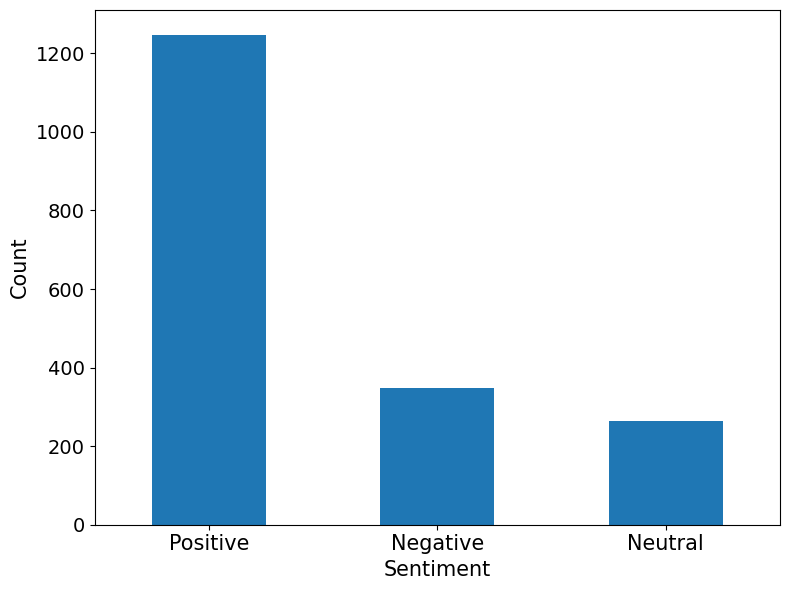

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
samsung['Sentiment-TB'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'], rotation=0, fontsize=15)
# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)


# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

## Keyword analysis

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
## Initializing vectorizer for topic modeling
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(samsung['Text'])   ## fitting the required data.

In [62]:
## by applying Latent Dirichlet Allocation i.e LDA
lda = LatentDirichletAllocation(n_components=50, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=50, random_state=42)

In [63]:
# Get the top words for each topic
terms = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([terms[i] for i in topic.argsort()[:-6:-1]])

In [64]:
print("Top topics:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")

Top topics:
Topic 1: maybe, like, likely, india, cable
Topic 2: text, person, zoom, gen, gonna
Topic 3: taking, monitor, miss, reading, right
Topic 4: apps, phone, lock, secure, feature
Topic 5: charger, wireless, tablet, wifi, natural
Topic 6: thread, ask, support, question, storage
Topic 7: account, basically, care, goes, leaks
Topic 8: security, january, watch, blue, instead
Topic 9: good, pen, ive, recommend, got
Topic 10: quality, camera, phone, purchase, im
Topic 11: add, ability, suggest, better, drain
Topic 12: best, apps, play, wife, use
Topic 13: different, news, store, thoughts, repair
Topic 14: rumors, bixby, accounts, leaks, talking
Topic 15: idk, fast, charge, takes, stuck
Topic 16: vouchers, discount, havent, maximum, start
Topic 17: su, phone, ive, im, small
Topic 18: easier, watch, tv, guy, smart
Topic 19: phone, data, sim, series, mobile
Topic 20: im, phone, ultra, line, dont
Topic 21: tv, turn, button, fine, tried
Topic 22: usd, lockscreen, notifications, usually, ch

## Aspect-Based Sentiment Analysis

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
## Lets define the aspects like their battery health , camera quality , about screen and all from the comments that are mostly highlighting.
aspects = ['camera', 'battery', 'screen', 'performance', 'ai', 'storage', 'design', 'model']

In [67]:
vectorizer = CountVectorizer(vocabulary=aspects, stop_words='english')

In [68]:
### Transform the text data
X = vectorizer.transform(samsung['Text'])

In [69]:
# Add column for aspect mention
samsung.loc[:, 'Aspect-Mentions'] = X.sum(axis=1)

In [70]:
# Analyze sentiment for each given aspect such as performance, battery and all.
for aspect in aspects:
    samsung[f'Sentiment-{aspect}'] = samsung['Text'].apply(lambda x: 'Positive' if aspect in x and TextBlob(x).sentiment.polarity > 0 else ('Negative' if aspect in x and TextBlob(x).sentiment.polarity < 0 else 'Neutral'))

In [71]:
samsung.loc[:, 'comparison'] = samsung['Sentiment-Vader'] == samsung['Sentiment-TB']

In [72]:
comparison_percentage = samsung['comparison'].mean() * 100
comparison_percentage

69.01181525241675

In [73]:
## Finally the aspect sentiments.
aspect_sentiment = samsung.groupby('comparison').agg({
    'Aspect-Mentions': 'sum',
    **{f'Sentiment-{aspect}': lambda x: x.value_counts().to_dict() for aspect in aspects}
}).reset_index()

In [74]:
print(aspect_sentiment)

   comparison  Aspect-Mentions  \
0       False              311   
1        True             1160   

                                    Sentiment-camera  \
0   {'Neutral': 550, 'Positive': 14, 'Negative': 13}   
1  {'Neutral': 1106, 'Positive': 172, 'Negative': 7}   

                                   Sentiment-battery  \
0   {'Neutral': 517, 'Positive': 32, 'Negative': 28}   
1  {'Neutral': 1101, 'Positive': 160, 'Negative':...   

                                    Sentiment-screen  \
0   {'Neutral': 525, 'Positive': 28, 'Negative': 24}   
1  {'Neutral': 1110, 'Positive': 151, 'Negative':...   

                              Sentiment-performance  \
0    {'Neutral': 566, 'Positive': 8, 'Negative': 3}   
1  {'Neutral': 1216, 'Positive': 66, 'Negative': 3}   

                                        Sentiment-ai  \
0   {'Neutral': 436, 'Positive': 74, 'Negative': 67}   
1  {'Neutral': 776, 'Positive': 442, 'Negative': 67}   

                                Sentiment-storage  \
0 

## Word Frequency by Sentiment

In [75]:
positive_reviews = samsung[samsung['Sentiment-TB'] == 'Positive']['Text']
negative_reviews = samsung[samsung['Sentiment-TB'] == 'Negative']['Text']

In [76]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)

In [77]:
## for the positive one

In [78]:
positive_vector = vectorizer.fit_transform(positive_reviews)
positive_words = pd.DataFrame(positive_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Positive Words:")
print(positive_words.sum().sort_values(ascending=False).head(20))

Top Positive Words:
samsung    1236
phone       977
im          808
like        688
new         477
ive         423
galaxy      394
ultra       378
use         359
dont        341
battery     295
phones      289
want        280
really      266
time        266
camera      264
using       260
better      249
iphone      244
years       242
dtype: int64


In [79]:
## similarly for the negative one.
negative_vector = vectorizer.fit_transform(negative_reviews)
negative_words = pd.DataFrame(negative_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Negative Words:")
print(negative_words.sum().sort_values(ascending=False).head(20))

Top Negative Words:
phone      293
samsung    273
im         193
like       112
use         96
ive         95
dont        90
phones      82
know        81
series      76
ultra       76
tv          73
issue       68
base        65
screen      65
ui          64
update      63
battery     63
device      59
watch       59
dtype: int64


In [80]:
## in the same way we can do for neutral one also, no major change is there.

In [81]:
## here we Comparing sum of upvotes for each sentiment label.
upvotes_comparison = samsung.groupby(['comparison']).agg({'Upvotes': 'sum'}).reset_index()
upvotes_comparison

,comparison,Upvotes
0,False,23152
1,True,39783


In [82]:
## and in this we are Comparing each sentiment upvotes with the mean score.
avg_upvotes_sentiment = samsung.groupby(['comparison']).agg({'Upvotes': 'mean'}).reset_index()
avg_upvotes_sentiment

,comparison,Upvotes
0,False,40.124783
1,True,30.959533


## Aspect Sentiment Based on upvotes

In [83]:
aspect_sentiment_upvotes = samsung.groupby(['Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [84]:
aspect_sentiment_upvotes

,Aspect-Mentions,Upvotes
0,0,43642
1,1,7629
2,2,3752
3,3,3275
4,4,919
5,5,80
6,6,967
7,7,780
8,8,22
9,9,1839


In [85]:
aspect_sentiment_upvotes = samsung.groupby(['comparison', 'Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [86]:
aspect_sentiment_upvotes

,comparison,Aspect-Mentions,Upvotes
0,False,0,17466
1,False,1,2434
2,False,2,1678
3,False,3,1485
4,False,4,1
5,False,5,12
6,False,6,76
7,False,8,0
8,True,0,26176
9,True,1,5195


# BERT Sentiments

In [87]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [88]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [89]:
def safe_BERT_analysis(text):
    try:
        result = sentiment_pipeline(text[:512])  # Only take the first 512 characters
        return result[0]['label']
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

In [90]:
# Apply the sentiment analysis function to the 'text' column in the iPhone DataFrame
samsung['BERT-sentiment'] = samsung['Text'].apply(safe_BERT_analysis)

In [91]:
samsung.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,In market for new phone... is Samsung hard to ...,2,2025-01-11 10:30:58,phone samsung galaxy bought back think last ti...,Positive,0.7506,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,1 star
1,Samsung s24+ swipe texting is terrible,3,2025-01-11 08:56:42,swipe texting accurate rarely type manually ge...,Positive,0.9162,Positive,Positive,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Positive,True,1 star
2,S23 vs S24 fe,5,2025-01-11 08:37:54,undecided phones sfe dont play game phone use ...,Negative,-0.5809,Negative,Negative,0,Negative,Negative,Neutral,Negative,Negative,Neutral,Neutral,Neutral,True,2 stars
3,Samsung S23 FE charging,2,2025-01-11 08:13:06,fe lost charge today whilst driving home tried...,Negative,-0.3658,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,1 star
4,connecting TV to SDK (Tizen studio device mana...,1,2025-01-11 07:44:02,wanted connect samsung tv sdk getting error ad...,Negative,-0.6249,Neutral,Neutral,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,1 star


In [92]:
samsung['BERT-sentiment'].value_counts()

BERT-sentiment
1 star     989
3 stars    261
2 stars    235
5 stars    220
4 stars    157
Name: count, dtype: int64

In [93]:
new_mapping = {
    "1 star": "worst",
    "2 stars": "Bad",
    "3 stars": "Average",
    "4 stars": "Good",
    "5 stars": "Excellant"
}

In [94]:
samsung['BERT-sentiment'] = samsung['BERT-sentiment'].map(new_mapping)

In [95]:
samsung.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,In market for new phone... is Samsung hard to ...,2,2025-01-11 10:30:58,phone samsung galaxy bought back think last ti...,Positive,0.7506,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst
1,Samsung s24+ swipe texting is terrible,3,2025-01-11 08:56:42,swipe texting accurate rarely type manually ge...,Positive,0.9162,Positive,Positive,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Positive,True,worst
2,S23 vs S24 fe,5,2025-01-11 08:37:54,undecided phones sfe dont play game phone use ...,Negative,-0.5809,Negative,Negative,0,Negative,Negative,Neutral,Negative,Negative,Neutral,Neutral,Neutral,True,Bad
3,Samsung S23 FE charging,2,2025-01-11 08:13:06,fe lost charge today whilst driving home tried...,Negative,-0.3658,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst
4,connecting TV to SDK (Tizen studio device mana...,1,2025-01-11 07:44:02,wanted connect samsung tv sdk getting error ad...,Negative,-0.6249,Neutral,Neutral,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst


In [108]:
samsung['BERT-sentiment'].value_counts()

BERT-sentiment
worst        989
Average      261
Bad          235
Excellant    220
Good         157
Name: count, dtype: int64

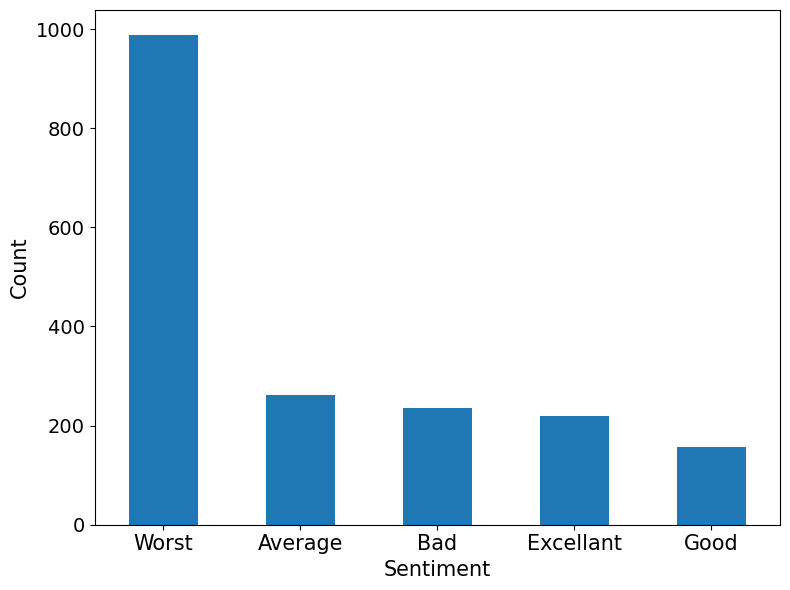

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
samsung['BERT-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Worst','Average','Bad','Excellant','Good'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# RoBERTa Sentiments

In [97]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
def get_Roberta_sentiment(text):
    if not text:  # Check for empty text
        return 'neutral'  # You can return a default sentiment if text is empty
    
    sentences = nltk.sent_tokenize(text)  # Split text into sentences
    sentiments = []
    
    # Apply sentiment analysis for each sentence
    for sentence in sentences:
        try:
            # Check for any empty sentence
            if sentence.strip():
                result = sentiment_pipeline(sentence, truncation=True, padding=True, max_length=512)
                if result:  # Check if sentiment analysis returned a result
                    sentiments.append(result[0]['label'])
        except Exception as e:
            print(f"Error processing sentence '{sentence}': {e}")
    
    # Check if no valid sentiments were collected
    if not sentiments:
        return 'neutral'  # Return a default sentiment if no sentiments are found
    
    # Return the majority sentiment, or you can choose a different aggregation method
    return max(set(sentiments), key=sentiments.count)

In [100]:
samsung['RoBERTa-sentiment'] = samsung['Text'].apply(get_Roberta_sentiment)

In [101]:
samsung.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,In market for new phone... is Samsung hard to ...,2,2025-01-11 10:30:58,phone samsung galaxy bought back think last ti...,Positive,0.7506,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,LABEL_2
1,Samsung s24+ swipe texting is terrible,3,2025-01-11 08:56:42,swipe texting accurate rarely type manually ge...,Positive,0.9162,Positive,Positive,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Positive,True,worst,LABEL_1
2,S23 vs S24 fe,5,2025-01-11 08:37:54,undecided phones sfe dont play game phone use ...,Negative,-0.5809,Negative,Negative,0,Negative,Negative,Neutral,Negative,Negative,Neutral,Neutral,Neutral,True,Bad,LABEL_1
3,Samsung S23 FE charging,2,2025-01-11 08:13:06,fe lost charge today whilst driving home tried...,Negative,-0.3658,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst,LABEL_0
4,connecting TV to SDK (Tizen studio device mana...,1,2025-01-11 07:44:02,wanted connect samsung tv sdk getting error ad...,Negative,-0.6249,Neutral,Neutral,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst,LABEL_0


In [102]:
samsung['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
LABEL_1    971
LABEL_0    450
LABEL_2    440
neutral      1
Name: count, dtype: int64

In [103]:
label_map = {
    'LABEL_0': 'negative',  # or 'LABEL_0' represents negative sentiment
    'LABEL_1': 'neutral',   # 'LABEL_1' represents neutral sentiment
    'LABEL_2': 'positive',  # 'LABEL_2' represents positive sentiment
}

In [104]:
samsung['RoBERTa-sentiment'] = samsung['RoBERTa-sentiment'].map(label_map)

In [105]:
samsung['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
neutral     971
negative    450
positive    440
Name: count, dtype: int64

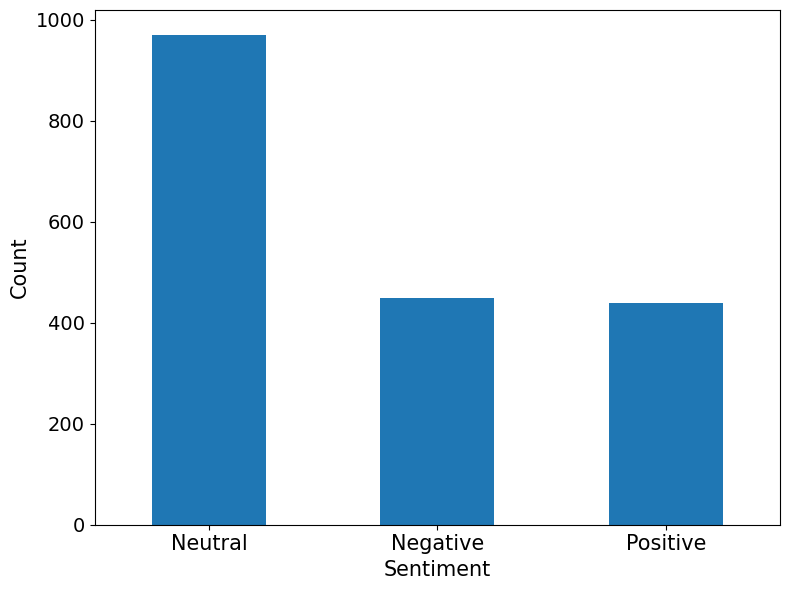

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size
samsung['RoBERTa-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Neutral', 'Negative', 'Positive'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [107]:
samsung.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,In market for new phone... is Samsung hard to ...,2,2025-01-11 10:30:58,phone samsung galaxy bought back think last ti...,Positive,0.7506,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,positive
1,Samsung s24+ swipe texting is terrible,3,2025-01-11 08:56:42,swipe texting accurate rarely type manually ge...,Positive,0.9162,Positive,Positive,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Positive,True,worst,neutral
2,S23 vs S24 fe,5,2025-01-11 08:37:54,undecided phones sfe dont play game phone use ...,Negative,-0.5809,Negative,Negative,0,Negative,Negative,Neutral,Negative,Negative,Neutral,Neutral,Neutral,True,Bad,neutral
3,Samsung S23 FE charging,2,2025-01-11 08:13:06,fe lost charge today whilst driving home tried...,Negative,-0.3658,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst,negative
4,connecting TV to SDK (Tizen studio device mana...,1,2025-01-11 07:44:02,wanted connect samsung tv sdk getting error ad...,Negative,-0.6249,Neutral,Neutral,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,worst,negative
